In [46]:
import wandb

In [15]:
from fastai.vision.all import *

from PIL import Image

import matplotlib.pyplot as plt


In [30]:
alphabet_labels = "A B C D E F G H I J K L M N O P Q R S T U V W X Y Z".split(" ")

In [31]:
path = Path("alphabet/Images/Images")

In [38]:
def open_font(n=0):
    return [load_image(path/f"{c}/{n}.png", mode="L") for c in alphabet_labels]

In [84]:
load_image??

Signature: load_image(fn, mode=None)
Source:   
def load_image(fn, mode=None):
    "Open and load a `PIL.Image` and convert to `mode`"
    im = Image.open(fn)
    im.load()
    im = im._new(im.im)
    return im.convert(mode) if mode else im
File:      ~/mambaforge/envs/fastai/lib/python3.10/site-packages/fastai/vision/core.py
Type:      function


In [43]:
@delegates(subplots)
def show_images(ims, nrows=1, ncols=None, titles=None, show_args={}, **kwargs):
    "Show all images `ims` as subplots with `rows` using `titles`."
    if ncols is None: ncols = int(math.ceil(len(ims)/nrows))
    if titles is None: titles = [None]*len(ims)
    axs = subplots(nrows, ncols, **kwargs)[1].flat
    for im,t,ax in zip(ims, titles, axs): show_image(im, ax=ax, title=t, **show_args)

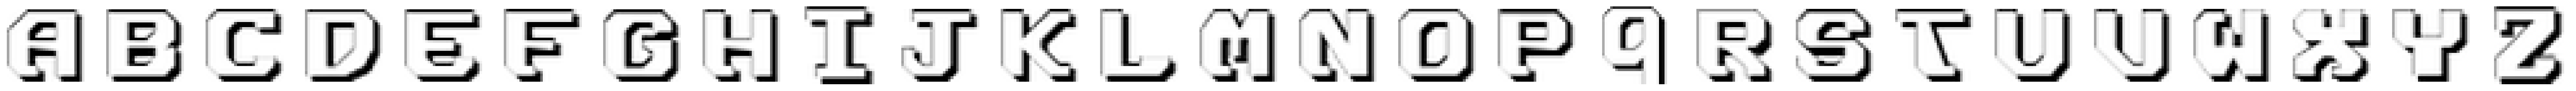

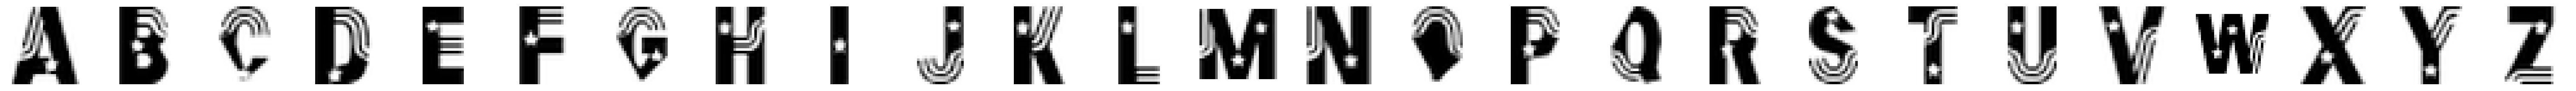

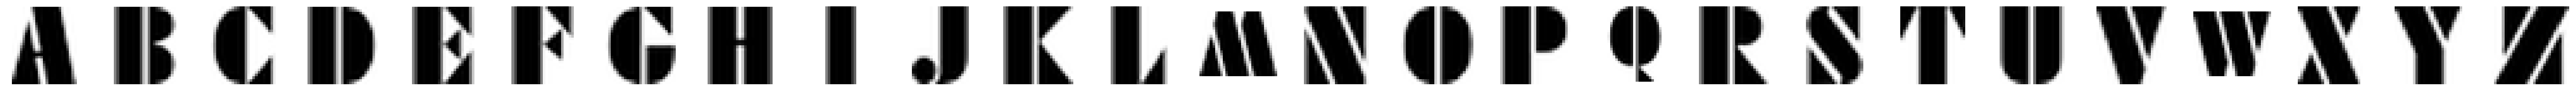

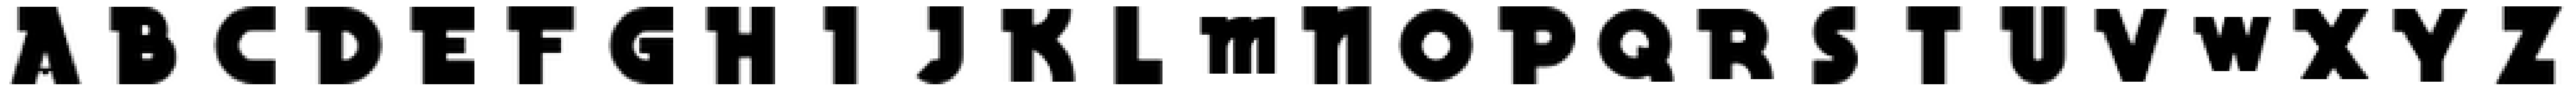

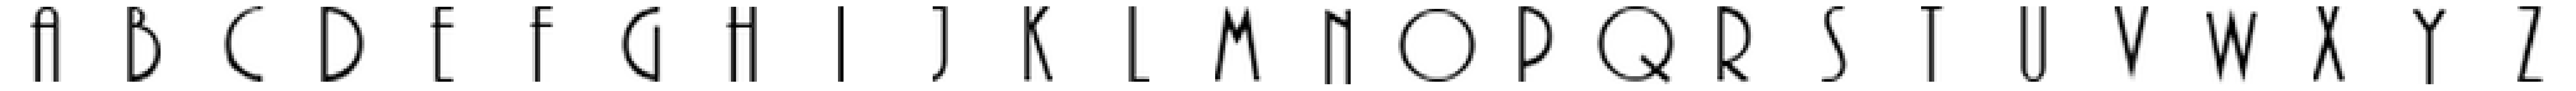

In [66]:
for n in random.sample(range(1000), k=5):
    show_images(open_font(n), show_args={'cmap':'Greys'})

In [59]:
f = open_font()

In [60]:
np.array(f[0])

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [70]:
def wandb_bw_image(pil_image):
    return wandb.Image(255 - np.array(pil_image))

In [80]:
table = wandb.Table(columns=["id", *alphabet_labels])
for n in random.sample(range(1000), k=100):
    font = open_font(n)
    table.add_data(n, *[wandb_bw_image(c) for c in font])

In [81]:
wandb.init(project="train_fonts", job_type="EDA")

In [82]:
wandb.log({"dataset_sample":table})

In [83]:
wandb.finish()